In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
warnings.filterwarnings('ignore') # no more warnings 
pd.set_option('display.max_columns', None) # displays all columns in dfs

import plotly.express as px
#import plotly.graph_objects as go
#import plotly.io as pio

In [2]:
dataset = pd.read_csv('startup data.csv')

In [3]:
dataset

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0          1005         CA  42.358880  -71.056820    92101   c:6669   
1           204         CA  37.238916 -121.973718    95032  c:16283   
2          1001         CA  32.901049 -117.192656    92121  c:65620   
3           738         CA  37.320309 -122.050040    95014  c:42668   
4          1002         CA  37.779281 -122.419236    94105  c:65806   
..          ...        ...        ...         ...      ...      ...   
918         352         CA  37.740594 -122.376471    94107  c:21343   
919         721         MA  42.504817  -71.195611     1803  c:41747   
920         557         CA  37.408261 -122.015920    94089  c:31549   
921         589         CA  37.556732 -122.288378    94404  c:33198   
922         462         CA  37.386778 -121.966277    95054  c:26702   

              city              Unnamed: 6                  name  labels  \
0        San Diego                     NaN           Bandsintown       1   
1        Los Gatos                     NaN             TriCipher       1   
2        San Diego      San Diego CA 92121                 Plixi       1   
3        Cupertino      Cupertino CA 95014     Solidcore Systems       1   
4    San Francisco  San Francisco CA 94105        Inhale Digital       0   
..             ...                     ...                   ...     ...   
918  San Francisco                     NaN               CoTweet       1   
919     Burlington      Burlington MA 1803    Reef Point Systems       0   
920      Sunnyvale                     NaN       Paracor Medical       0   
921  San Francisco                     NaN               Causata       1   
922    Santa Clara    Santa Clara CA 95054  Asempra Technologies       1   

    founded_at  closed_at first_funding_at last_funding_at  \
0     1/1/2007        NaN         4/1/2009        1/1/2010   
1     1/1/2000        NaN        2/14/2005      12/28/2009   
2    3/18/2009        NaN        3/30/2010       3/30/2010   
3     1/1/2002        NaN        2/17/2005       4/25/2007   
4     8/1/2010  10/1/2012         8/1/2010        4/1/2012   
..         ...        ...              ...             ...   
918   1/1/2009        NaN         7/9/2009        7/9/2009   
919   1/1/1998  6/25/2008         4/1/2005       3/23/2007   
920   1/1/1999  6/17/2012        6/29/2007       6/29/2007   
921   1/1/2009        NaN        10/5/2009       11/1/2011   
922   1/1/2003        NaN        2/13/2006       2/13/2006   

     age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                    2.2493                 3.0027                    4.6685   
1                    5.1260                 9.9973                    7.0055   
2                    1.0329                 1.0329                    1.4575   
3                    3.1315                 5.3151                    6.0027   
4                    0.0000                 1.6685                    0.0384   
..                      ...                    ...                       ...   
918                  0.5178                 0.5178                    0.5808   
919                  7.2521                 9.2274                    6.0027   
920                  8.4959                 8.4959                    9.0055   
921                  0.7589                 2.8329                    0.7589   
922                  3.1205                 3.1205                    4.0027   

     age_last_milestone_year  relationships  funding_rounds  \
0                     6.7041              3               3   
1                     7.0055              9               4   
2                     2.2055              5               1   
3                     6.0027              5               3   
4                     0.0384              2               2   
..                       ...            ...             ...   
918                   4.5260              9               1   
919                   6.0027 

In [4]:
dataset.describe()

Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                771.000000               771.000000     923.000000   
mean                   3.055353                 4.754423       7.710726   
std                    2.977057                 3.212107       7.265776   
min                  -14.169900                -7.005500       0.000000   
25%                    1.000000                 2.411000       3.000000   
50%                    2.520500                 4.476700       5.000000   
75%                    4.686300                 6.753400      10.000000   
max                   24.684900                24.684900      63.000000   

       funding_rounds  funding_total_usd  milestones       is_CA       is_NY  \
count      923.000000       9.230000e+02  923.000000  923.000000  923.000000   
mean         2.310943       2.541975e+07    1.841820    0.527627    0.114843   
std          1.390922       1.896344e+08    1.322632    0.499507    0.319005   
min          1.000000       1.100000e+04    0.000000    0.000000    0.000000   
25%          1.000000       2.725000e+06    1.000000    0.000000    0.000000   
50%          2.000000       1.000000e+07    2.000000    1.000000    0.000000   
75%          3.000000       2.472500e+07    3.000000    1.000000    0.000000   
max         10.000000       5.700000e+09    8.000000    1.000000    1.000000   

            is_MA       is_TX  is_otherstate  is_software      is_web  \
count  923.000000  923.000000     923.000000   923.000000  923.000000   
mean     0.089924    0.045504       0.221018     0.165764    0.156013   
std      0.286228    0.208519       0.415158     0.372070    0.363064   
min      0.000000    0.000000       0.000000     0.000000    0.000000   
25%      0.000000    0.000000       0.000000     0.000000    0.000000   
50%      0.000000    0.000000       0.000000     0.000000    0.000000   
75%      0.000000    0.000000       0.000000     0.000000    0.000000   
max      1.000000    1.000000       1.000000     1.000000    1.000000   

       is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  \
count  923.00000     923.000000      923.000000     923.000000    923.000000   
mean     0.08559       0.079090        0.067172       0.056338      0.027086   
std      0.27991       0.270025        0.250456       0.230698      0.162421   
min      0.00000       0.000000        0.000000       0.000000      0.000000   
25%      0.00000       0.000000        0.000000       0.000000      0.000000   
50%      0.00000       0.000000        0.000000       0.000000      0.000000   
75%      0.00000       0.000000        0.000000       0.000000      0.000000   
max      1.00000       1.000000        1.000000       1.000000      1.000000   

       is_biotech  is_consulting  is_othercategory      has_VC   has_angel  \
count  923.000000     923.000000        923.000000  923.000000  923.000000   
mean     0.036836       0.003250          0.3228

In [5]:
dataset.rename(columns={'labels':'is_acquired'}, inplace=True)

# CLEANING

In [6]:
drop_columns = ['Unnamed: 0', 'latitude', 'longitude', 'id', 'state_code', 'state_code.1', 'Unnamed: 6', 'name',
                'object_id', 'status', 'category_code', 'closed_at', 'age_first_milestone_year', 
                'age_last_milestone_year','zip_code', 'founded_at', 'first_funding_at', 'last_funding_at',
               'is_software','is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                'is_biotech', 'is_consulting', 'is_othercategory','funding_total_usd', 'city']

dataset = dataset.drop(columns=drop_columns) # dropping unnecessary columns

In [7]:
numerical_variables = dataset[['is_acquired', 'relationships', 'funding_rounds', 'milestones', 'avg_participants']]
                               #'has_roundA','has_roundB','has_roundC','has_roundD','is_top500']]
numerical_variables

is_acquired  relationships  funding_rounds  milestones  avg_participants
0              1              3               3           3            1.0000
1              1              9               4           1            4.7500
2              1              5               1           2            4.0000
3              1              5               3           1            3.3333
4              0              2               2           1            1.0000
..           ...            ...             ...         ...               ...
918            1              9               1           2            6.0000
919            0              1               3           1            2.6667
920            0              5               1           1            8.0000
921            1             12               2           2            1.0000
922            1              4               1           1            3.0000

[923 rows x 5 columns]

is_acquired


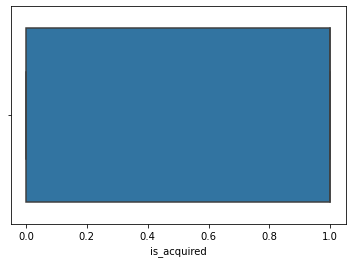

relationships


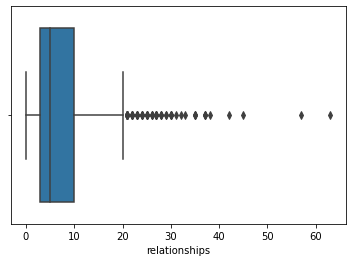

funding_rounds


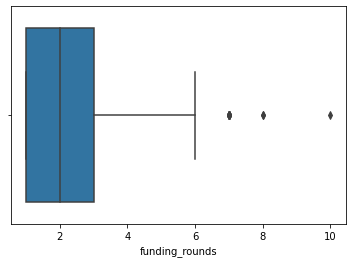

milestones


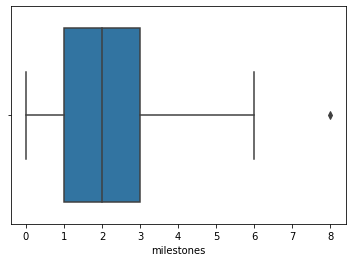

avg_participants


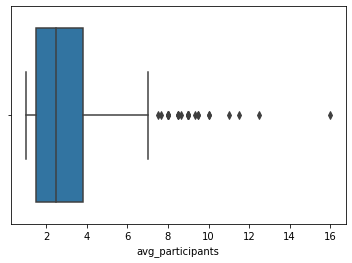

In [8]:
for item in numerical_variables.columns: # iterate over all numerical columns and show the boxplot for each
    print(item)
    sns.boxplot(x = numerical_variables[item])
    plt.show()

In [9]:
columns_to_drop = ['milestones', 'funding_rounds'] # columns with outliers to drop
for drop in columns_to_drop:                       # iterate over the columns to drop
    print(dataset.shape)                           # dataframe shape before drops
    
    Q1 = dataset.quantile(0.25) # first quantile
    Q3 = dataset.quantile(0.75) # third quantile
    IQR = Q3 - Q1               # inter quantile range

    dataset = dataset[~(                                 # negation so we get the datapoints within the whiskers
        (dataset[columns_to_drop] < (Q1 - 1.5 * IQR))    # datapoints left of the "left whisker"
        |(dataset[columns_to_drop] > (Q3 + 1.5 * IQR)    # datapoints right of the 'right whisker'
        )).any(axis=1)]
    
    print(dataset.shape)                    # data frame shape after drops
    #sns.distplot(dataset[drop])
    #plt.show()

(923, 19)
(906, 19)
(906, 19)
(906, 19)


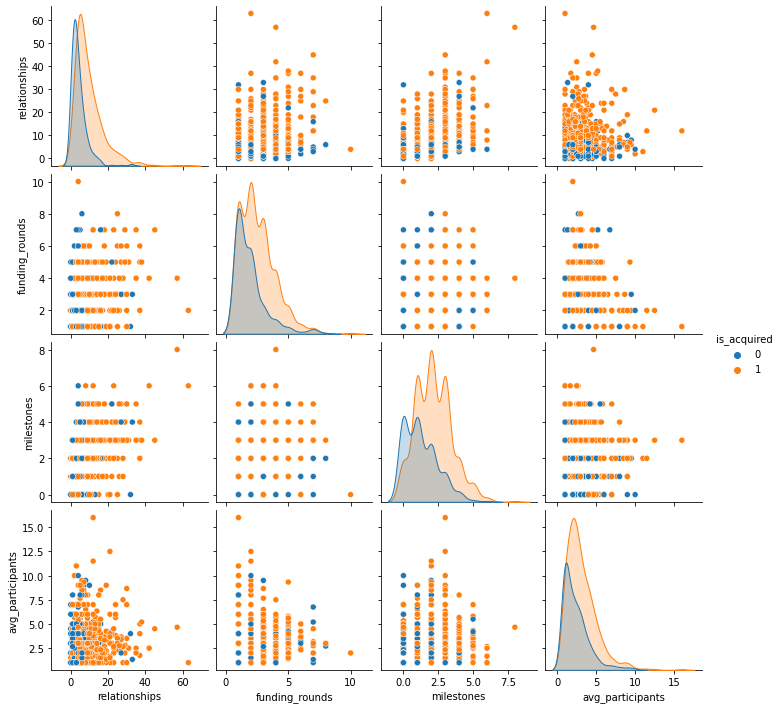

In [10]:
sns.pairplot(numerical_variables, hue = 'is_acquired')

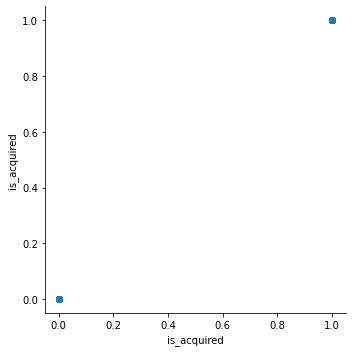

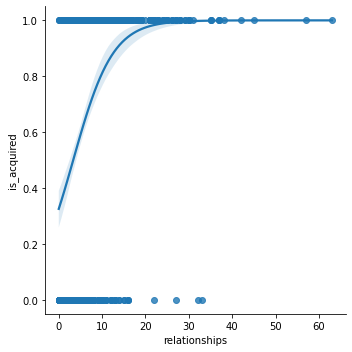

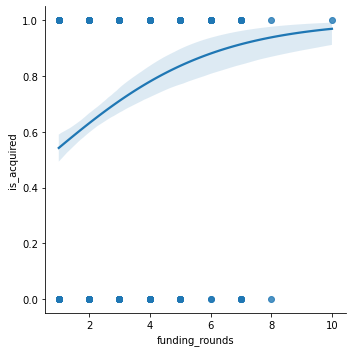

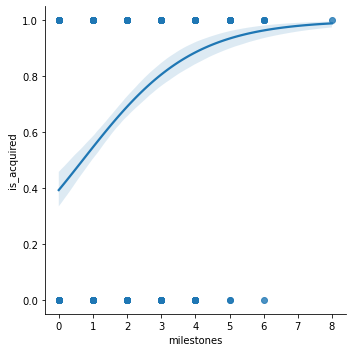

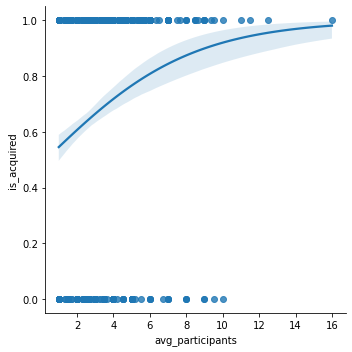

In [11]:
for feature in numerical_variables:
    sns.lmplot(x=feature, y="is_acquired", data=numerical_variables, logistic= True) # logit regression on #variables X= feature, y=Purchased

# TRAIN TEST SPLIT

In [12]:
split_feature = 'is_acquired'                    # choose feature to split
x = dataset[dataset.columns.drop(split_feature)] # features
y = dataset[split_feature]    

In [13]:
x = pd.get_dummies(x, drop_first = True) # dummification
x_features = x.columns.to_list()         # safe feature list for later

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42) # train test split with test size 20%

In [15]:
numerical_transformer = StandardScaler() #initialization of the method

In [16]:
X_train = numerical_transformer.fit_transform(X_train) # fit and transform X_train
X_test = numerical_transformer.transform(X_test)       # transformX_test

In [17]:
reg = LinearRegression() #initialization of the method

In [18]:
reg.fit(X_train, y_train) # train on the train data

LinearRegression()

In [19]:
predictions_train = reg.predict(X_train) # create predictions for our train data
predictions_test = reg.predict(X_test)   # create predictions for our test data

In [20]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, predictions_train) # calculate r2 score for train data
r2_test = r2_score(y_test, predictions_test)    # calculate r2 score for test data

print('R2 value for train: {}'.format(r2_train))
print('R2 value for test: {}'.format(r2_test)) 

R2 value for train: 0.25997245961113224
R2 value for test: 0.17381172500269215


In [21]:
# Feature importance 
feature_importance = pd.DataFrame({ 
    "feature_names": x_features,
    "coefficients": abs(reg.coef_)
})

feature_importance.sort_values(["coefficients"], ascending=False) # Ranking the features

feature_names  coefficients
5                    is_CA      0.467938
9            is_otherstate      0.356460
6                    is_NY      0.305543
7                    is_MA      0.288650
8                    is_TX      0.187227
2            relationships      0.099480
17               is_top500      0.092361
4               milestones      0.090058
1    age_last_funding_year      0.036301
10                  has_VC      0.035818
3           funding_rounds      0.029493
16        avg_participants      0.029049
11               has_angel      0.022172
0   age_first_funding_year      0.016353
12              has_roundA      0.008710
13              has_roundB      0.006768
14              has_roundC      0.006265
15              has_roundD      0.001949

# Conclusion

Linear Regression r2 score is very low, therefore we are putting focus on logartihmic regression.

# LOGISTIC REGRESSION

Taking a look at the numerical features

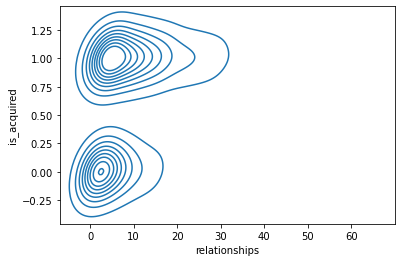

In [22]:
sns.kdeplot(x='relationships', y= "is_acquired", data=numerical_variables)
plt.show()

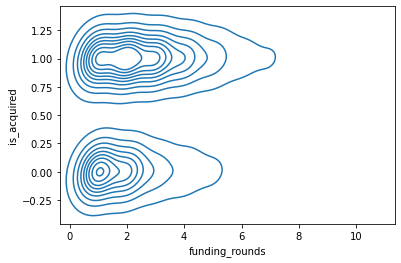

In [23]:
sns.kdeplot(x='funding_rounds', y= "is_acquired", data=numerical_variables)
plt.show()

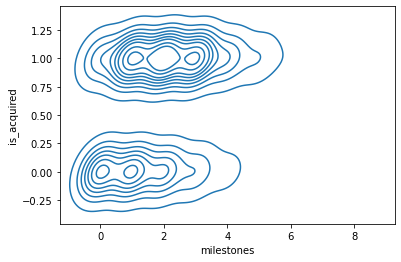

In [24]:
sns.kdeplot(x='milestones', y= "is_acquired", data=numerical_variables)
plt.show()

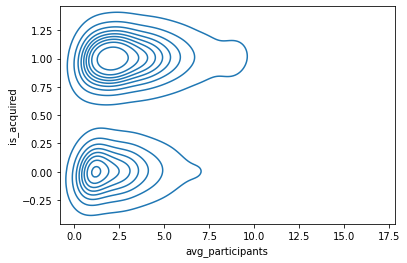

In [25]:
sns.kdeplot(x='avg_participants', y= "is_acquired", data=numerical_variables)
plt.show()

In [26]:
preprocessor = MinMaxScaler()                 #initialization of the method

X_train = preprocessor.fit_transform(X_train) # fit_transform on train data

X_test = preprocessor.transform(X_test)       # transform test data

In [27]:
classifier = LogisticRegression()     #initialization of the method

classifier.fit(X_train, y_train)      # logistic regression on train data

LogisticRegression()

In [28]:
# Feature importance 
feature_importance_log = pd.DataFrame({ 
    "feature_names": x_features,
    "coefficients": (((classifier.coef_))*22).tolist()[0]
})

feature_importance_log

feature_names  coefficients
0   age_first_funding_year      2.684489
1    age_last_funding_year      7.187039
2            relationships     76.925278
3           funding_rounds     15.552561
4               milestones     47.673585
5                    is_CA      4.596677
6                    is_NY      8.172044
7                    is_MA     12.743710
8                    is_TX     -2.193628
9            is_otherstate     -3.702179
10                  has_VC     -5.396597
11               has_angel     -3.424966
12              has_roundA      1.537879
13              has_roundB      1.755299
14              has_roundC      4.723711
15              has_roundD      8.178471
16        avg_participants     19.123189
17               is_top500     21.849001

In [29]:
# adding groups and renaming columns for presentation
feature_importance_log['group'] = ['funding','funding','social','funding','social','state','state','state','state','state','funding'
                                  ,'funding','funding','funding','funding','funding','social', 'social']
 
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['age_first_funding_year'],'First Funds')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['age_last_funding_year'],'Last Funds')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['funding_rounds'],'Funding Rounds')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_CA'],'California')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_NY'],'New York')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_MA'],'Massachusetts')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_TX'],'Texas')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_otherstate'],'Other States')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_VC'],'VC')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_angel'],'Angel')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_roundA'],'Round A')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_roundB'],'Round B')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_roundC'],'Round C')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['has_roundD'],'Round D')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['avg_participants'],'# Participants')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['is_top500'],'Top 500')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['relationships'],'Relationships')
feature_importance_log['feature_names'] = feature_importance_log['feature_names'].replace(['milestones'],'Milestones')

In [30]:
# sort into created groups for presentation
feature_importance_log = feature_importance_log.sort_values(by=['group'],ignore_index=True)

In [31]:
pred_train = classifier.predict(X_train)       # predictions for train data

In [32]:
prob_train = classifier.predict_proba(X_train) # propability for train data / first value for 0 other for 1

In [33]:
pred_test = classifier.predict(X_test)         # predictions for test data

In [34]:
prob_test = classifier.predict_proba(X_test)   # propability for test data / first value for 0 other for 1

In [35]:
# accuracy/ f1 score

print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))

accuracy on train set:  0.7665745856353591
accuracy on test set:  0.7527472527472527


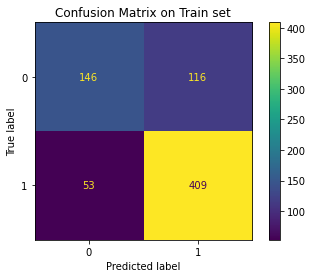

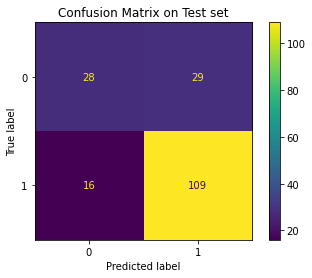

In [36]:
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63       262
           1       0.78      0.89      0.83       462

    accuracy                           0.77       724
   macro avg       0.76      0.72      0.73       724
weighted avg       0.76      0.77      0.76       724

              precision    recall  f1-score   support

           0       0.64      0.49      0.55        57
           1       0.79      0.87      0.83       125

    accuracy                           0.75       182
   macro avg       0.71      0.68      0.69       182
weighted avg       0.74      0.75      0.74       182



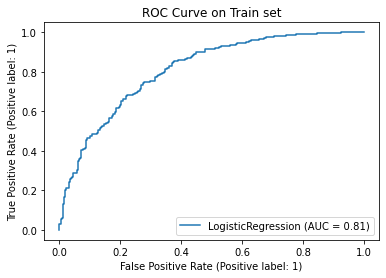

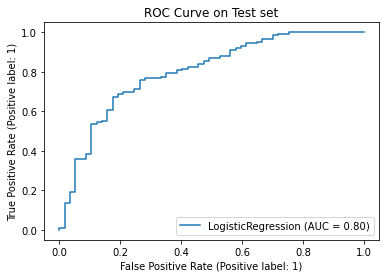

In [39]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

# Conclusion

The logistic regression provided us with a desireable outcome.

# VISUALIZATION

# Circular bar plot

In [40]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [41]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            fontsize = 16
        ) 

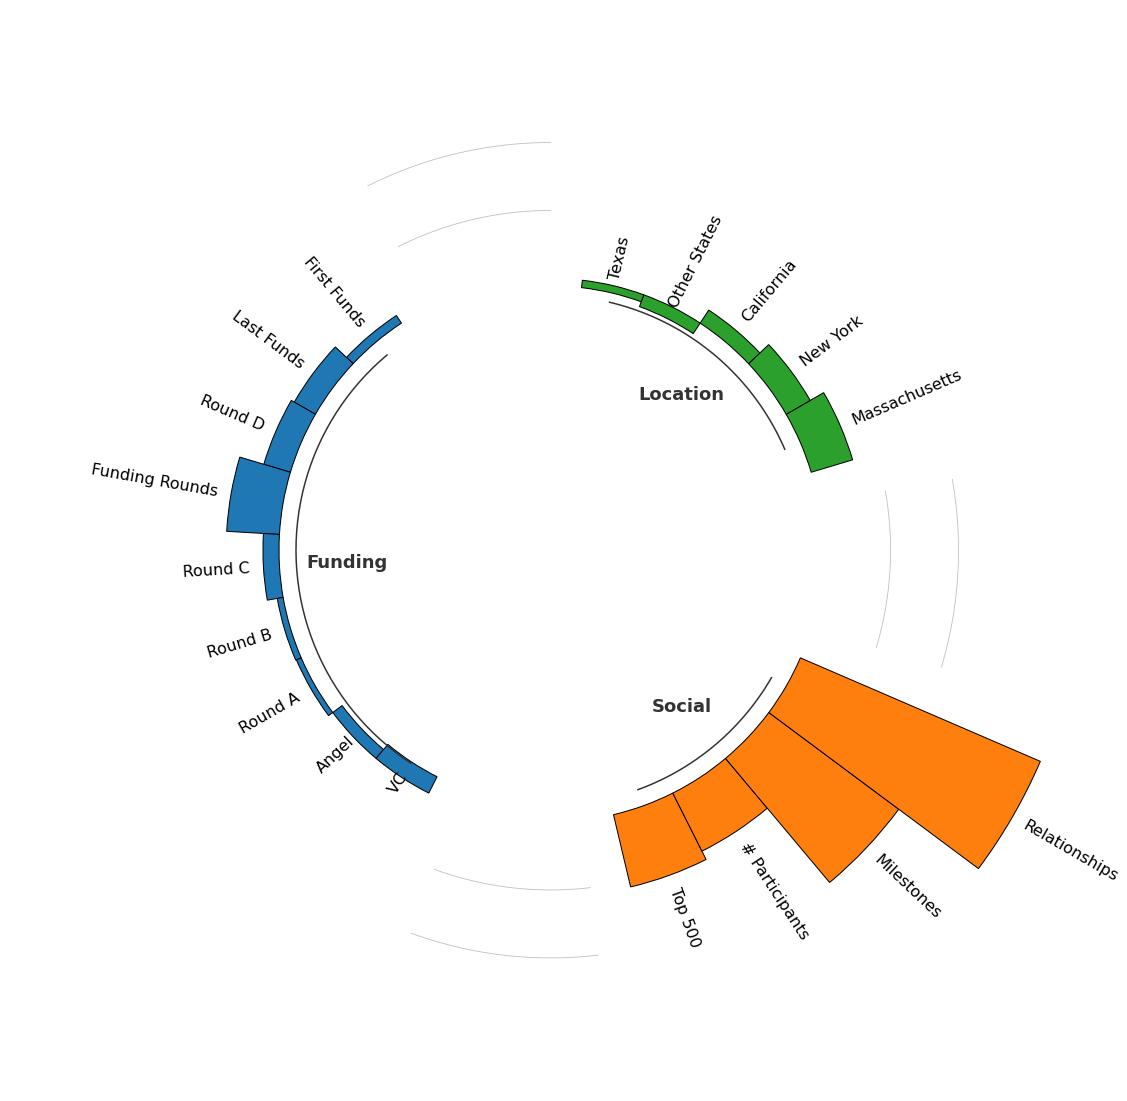

In [42]:
# get values, labels and groups from logistic regression
VALUES = feature_importance_log["coefficients"].values
LABELS = feature_importance_log["feature_names"].values
GROUP = feature_importance_log["group"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [9,4,5]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(40, 20), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-80, 80)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [9,4,5]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="black", linewidth=1
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Funding", "Social", "Location"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=18, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

### Location: Here the five different state options for startups (in our data)

### Funding: Here funds acquired by a startup

### Social: Here features that did not fit into the other two categories, also somewhat subjective

top 500: (assuming) startup was once considered a "top 500" startup (by?)

Ralationships: How many relationship does a startup have. For example a start up can have relationships with accountants, investors, vendors, mentors, etc.

Milestones: For any startup is a tracking mark for startups. Just like a milestone on the side of a road marks how far you've gone, a milestone in startups tracks progress as an startup grow and implement their plan.

#Participants: How many entities are participatinf with the startup

# Pie charts

# California

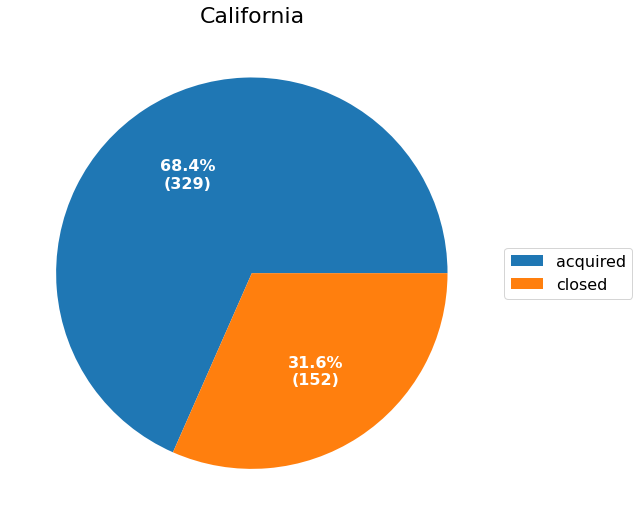

In [43]:
fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

recipe = ["329 acquired",
          "152 closed",
]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          fontsize = 16,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=16, weight="bold")

ax.set_title("California",fontsize= 22)

plt.show()

# New york

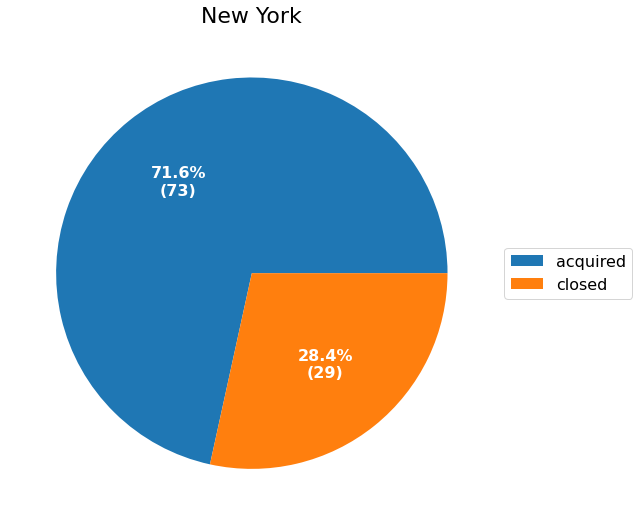

In [44]:
fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

recipe = ["73 acquired",
          "29 closed",
]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          fontsize = 16,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=16, weight="bold")

ax.set_title("New York",fontsize= 22)

plt.show()

simple pie charts did not satisfy our standards

# Sankey diagram

In [45]:
import plotly.graph_objects as go

In [46]:
texas = dataset[dataset['is_TX']==1]
texas.is_acquired.value_counts()

1    23
0    19
Name: is_acquired, dtype: int64

In [47]:
Mass = dataset[dataset['is_MA']==1]
Mass.is_acquired.value_counts()

1    63
0    18
Name: is_acquired, dtype: int64

In [48]:
otherst = dataset[dataset['is_otherstate']==1]
otherst.is_acquired.value_counts()

0    100
1     99
Name: is_acquired, dtype: int64

In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Dataset (906)', 'California (481)', 'New York (102)', 'Texas (42)', 'Massachusetts (81)','Other States (199)', 'acquired (588)', 'closed (317)'],
      color = "#CBB4D5"
    ),
    link = dict(
      source = [0,0,0,0,0, 1,1,2,2,3,3,4,4,5,5], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1,2,3,4,5, 6,7,6,7,6,7,6,7,6,7],
      value = [481,102,42,81,199, 329,152,73,29,23,19,63,18,100,99],
      color = ['#FEF3C9','#347aeb','#db7f46','#d15e8c','#86d15e','#EBBAB5','#A6E3D7','#EBBAB5','#A6E3D7','#EBBAB5','#A6E3D7','#EBBAB5','#A6E3D7','#EBBAB5','#A6E3D7']
  ))])

fig.update_layout(title_text="Acquisition by States", font_size=18)
fig.show()

In [50]:
States = pd.DataFrame({ 
    "State": ['California', 'New York', 'Massachusetts', 'Texas', 'Other State'],
    "acquired": [329, 73 , 63, 23, 100],
    "closed": [152, 29, 18, 19, 99],   
})
States["ratio"] =  round(States.acquired / States.closed,2)
States.sort_values(by = 'ratio', ascending = False)

State  acquired  closed  ratio
2  Massachusetts        63      18   3.50
1       New York        73      29   2.52
0     California       329     152   2.16
3          Texas        23      19   1.21
4    Other State       100      99   1.01

Massachusetts has the best ratio

# Funding Features

In [51]:
# get only the features we classified as funding
feature_importance_log_funding = feature_importance_log[feature_importance_log["group"] == 'funding']
feature_importance_log_funding = feature_importance_log_funding.drop(columns = 'group')
feature_importance_log_funding

feature_names  coefficients
0     First Funds      2.684489
1      Last Funds      7.187039
2         Round D      8.178471
3  Funding Rounds     15.552561
4         Round C      4.723711
5         Round B      1.755299
6         Round A      1.537879
7           Angel     -3.424966
8              VC     -5.396597

Text(0, 0.5, 'Feature Importance')

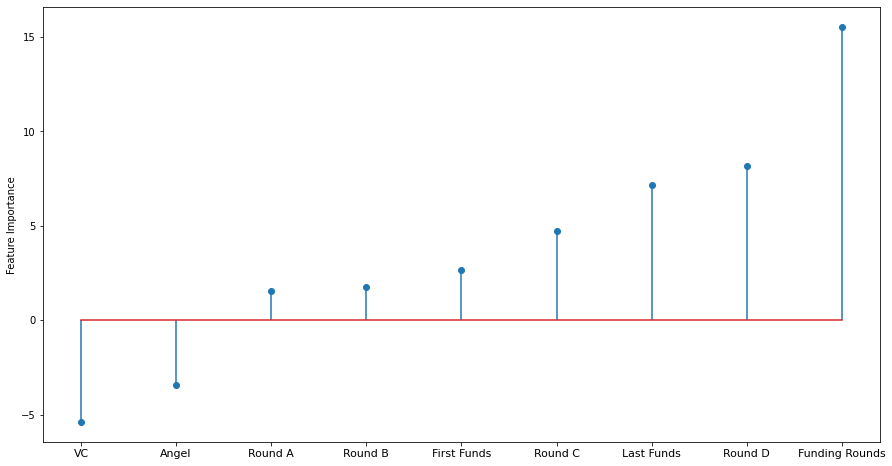

In [52]:
# Reorder it following the values:
ordered_df = feature_importance_log_funding.sort_values(by='coefficients')
my_range=range(len(feature_importance_log_funding.index))
plt.rcParams["figure.figsize"] = (15,8)

# Make the plot
plt.stem(ordered_df['coefficients'])
plt.xticks( my_range, ordered_df['feature_names'],fontsize = 11)
plt.ylabel('Feature Importance')

First Funds: Years after company foundation until first funding.

Last Funds: Years after company foundation until last funding.

Angel: An angel investor is an individual who provides capital for a business or businesses start-up, usually in exchange for convertible debt or ownership equity. 

VC: Venture capital (VC) is a form of private equity and a type of financing that investors provide to startup companies and small businesses that are believed to have long-term growth potential. Venture capital generally comes from well-off investors, investment banks, and any other financial institutions.

Round A : The first round after the seed stage is Series A funding. In this round, it’s important to have a plan for developing a business model that will generate long-term profit.

Round B : Series B rounds are all about taking businesses to the next level, past the development stage. Investors help startups get there by expanding market reach. Companies that have gone through seed and Series A funding rounds have already developed substantial user bases and have proven to investors that they are prepared for success on a larger scale.

Round C: Businesses that raise a Series C funding are already quite successful. These companies look for additional funding in order to help them develop new products, expand into new markets, or even to acquire other companies.

Round D: Series D funding is the fourth stage of fundraising that a business completes. 

Funding Rounds: The times a startup raised money.

# Conclusion

Location, age of a startup (as indicated by last funding) and relationships (access to advisors, mentors etc.) play a significant role in becoming a succesful startup.

Funding features also suggests that the more funding rounds a startup has or the further it is in the stage of fundraising (seed to Series D) the better are the chances to succeed.

This makes intuitively sense as future funding rounds in general can be only secured with new or existing investors if the startup demonstrated the ability to succeed in a given market (e.g. validated business model, high-growth, expanding market reach etc.).